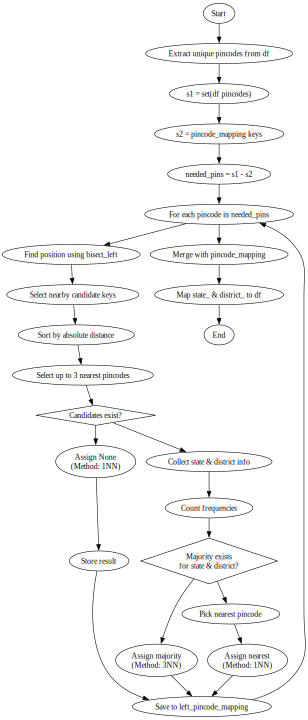

In [1]:
from graphviz import Digraph

dot = Digraph(comment='Pincode KNN Flowchart', format='png')
dot.attr(rankdir='TB', size='8,10')

# Nodes
dot.node('A', 'Start')
dot.node('B', 'Extract unique pincodes from df')
dot.node('C', 's1 = set(df pincodes)')
dot.node('D', 's2 = pincode_mapping keys')
dot.node('E', 'needed_pins = s1 - s2')

dot.node('F', 'For each pincode in needed_pins')
dot.node('G', 'Find position using bisect_left')
dot.node('H', 'Select nearby candidate keys')
dot.node('I', 'Sort by absolute distance')
dot.node('J', 'Select up to 3 nearest pincodes')

dot.node('K', 'Candidates exist?', shape='diamond')
dot.node('L', 'Assign None\n(Method: 1NN)')
dot.node('M', 'Store result')

dot.node('N', 'Collect state & district info')
dot.node('O', 'Count frequencies')

dot.node('P', 'Majority exists\nfor state & district?', shape='diamond')
dot.node('Q', 'Assign majority\n(Method: 3NN)')
dot.node('R', 'Pick nearest pincode')
dot.node('S', 'Assign nearest\n(Method: 1NN)')

dot.node('T', 'Save to left_pincode_mapping')
dot.node('U', 'Merge with pincode_mapping')
dot.node('V', 'Map state_ & district_ to df')
dot.node('W', 'End')

# Edges
dot.edges([
    ('A','B'), ('B','C'), ('C','D'), ('D','E'),
    ('E','F'),
    ('F','G'), ('G','H'), ('H','I'), ('I','J'),
    ('J','K'),

    ('K','L'), ('L','M'),
    ('K','N'),
    ('N','O'), ('O','P'),

    ('P','Q'),
    ('P','R'),
    ('R','S'),

    ('Q','T'),
    ('S','T'),
    ('M','T'),

    ('T','F'),
    ('F','U'),
    ('U','V'),
    ('V','W')
])

# Render
dot


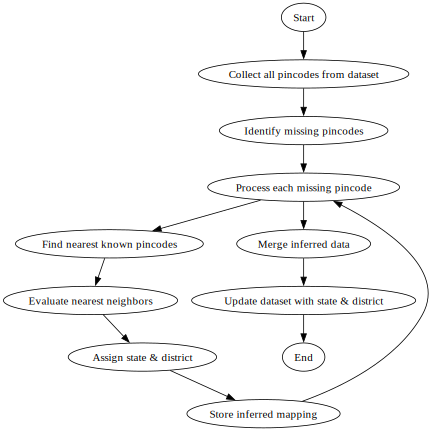

In [3]:
from graphviz import Digraph

dot = Digraph(comment='High-Level Pincode KNN Flowchart', format='png')
dot.attr(rankdir='TB', size='6,8')

# Nodes (all rectangles by default)
dot.node('A', 'Start')
dot.node('B', 'Collect all pincodes from dataset')
dot.node('C', 'Identify missing pincodes')
dot.node('D', 'Process each missing pincode')
dot.node('E', 'Find nearest known pincodes')
dot.node('F', 'Evaluate nearest neighbors')
dot.node('G', 'Assign state & district')
dot.node('H', 'Store inferred mapping')
dot.node('I', 'Merge inferred data')
dot.node('J', 'Update dataset with state & district')
dot.node('K', 'End')

# Edges
dot.edges([
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'F'),
    ('F', 'G'),
    ('G', 'H'),
    ('H', 'D'),  # loop for next missing pincode
    ('D', 'I'),
    ('I', 'J'),
    ('J', 'K')
])

# Render
dot


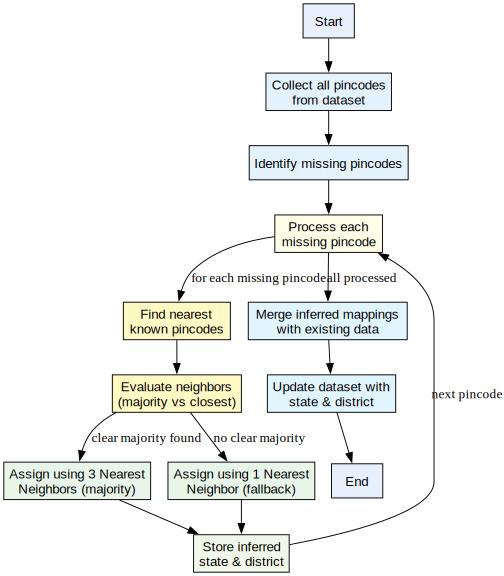

In [4]:
from graphviz import Digraph

dot = Digraph(
    comment='Pincode Completion Flowchart',
    format='png'
)

dot.attr(rankdir='TB', size='7,9', fontname='Helvetica')

# Default node style (rectangles)
dot.attr('node', shape='box', style='filled', fontname='Helvetica')

# Nodes
dot.node('A', 'Start', fillcolor='#E8F0FE')

dot.node('B', 'Collect all pincodes\nfrom dataset', fillcolor='#E3F2FD')
dot.node('C', 'Identify missing pincodes', fillcolor='#E3F2FD')

dot.node('D', 'Process each\nmissing pincode', fillcolor='#FFFDE7')

dot.node('E', 'Find nearest\nknown pincodes', fillcolor='#FFF9C4')
dot.node('F', 'Evaluate neighbors\n(majority vs closest)', fillcolor='#FFF9C4')

dot.node('G1', 'Assign using 3 Nearest\nNeighbors (majority)', fillcolor='#E8F5E9')
dot.node('G2', 'Assign using 1 Nearest\nNeighbor (fallback)', fillcolor='#E8F5E9')

dot.node('H', 'Store inferred\nstate & district', fillcolor='#F1F8E9')

dot.node('I', 'Merge inferred mappings\nwith existing data', fillcolor='#E1F5FE')
dot.node('J', 'Update dataset with\nstate & district', fillcolor='#E1F5FE')

dot.node('K', 'End', fillcolor='#E8F0FE')

# Edges with labels
dot.edge('A', 'B')
dot.edge('B', 'C')
dot.edge('C', 'D')

dot.edge('D', 'E', label='for each missing pincode')
dot.edge('E', 'F')

dot.edge('F', 'G1', label='clear majority found')
dot.edge('F', 'G2', label='no clear majority')

dot.edge('G1', 'H')
dot.edge('G2', 'H')

dot.edge('H', 'D', label='next pincode')

dot.edge('D', 'I', label='all processed')
dot.edge('I', 'J')
dot.edge('J', 'K')

# Render
dot
